In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.4.1


In [ ]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 83kB/s 
     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 3.8MB 55.9MB/s 
     |████████████████████████████████| 450kB 46.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=88701529a2633dd89ef42bc7793c5c7f8e9f326002e8f5880329e1167e59715d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tenso

In [ ]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

print(tf.__version__)

2.0.0


In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a color dimension to the images in "train" and "validate" dataset to
# leverage Keras's data augmentation utilities later.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
def create_model():
  model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
base_model = create_model()
base_model.fit(
    train_images,
    train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.1382 - accuracy: 0.9593 - val_loss: 0.0480 - val_accuracy: 0.9852
Epoch 2/5
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.0539 - accuracy: 0.9836 - val_loss: 0.0417 - val_accuracy: 0.9864
Epoch 3/5
60000/60000 [==============================] - 119s 2ms/sample - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0418 - val_accuracy: 0.9869
Epoch 4/5
60000/60000 [==============================] - 120s 2ms/sample - loss: 0.0309 - accuracy: 0.9899 - val_loss: 0.0357 - val_accuracy: 0.9888
Epoch 5/5
60000/60000 [==============================] - 121s 2ms/sample - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0329 - val_accuracy: 0.9900


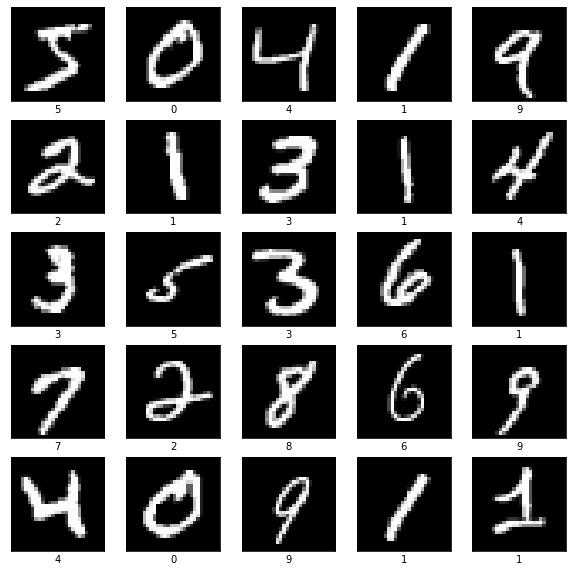

In [ ]:
# Show the first 25 images in the training dataset.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(train_images[i], axis=2), cmap=plt.cm.gray)
  plt.xlabel(train_labels[i])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fe0a4b050>,
      dtype=object)

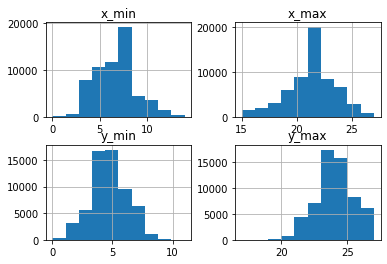

In [ ]:
# An utility function that returns where the digit is in the image.
def digit_area(mnist_image):
  # Remove the color axes
  mnist_image = np.squeeze(mnist_image, axis=2)

  # Extract the list of columns that contain at least 1 pixel from the digit
  x_nonzero = np.nonzero(np.amax(mnist_image, 0))
  x_min = np.min(x_nonzero)
  x_max = np.max(x_nonzero)

  # Extract the list of rows that contain at least 1 pixel from the digit
  y_nonzero = np.nonzero(np.amax(mnist_image, 1))
  y_min = np.min(y_nonzero)
  y_max = np.max(y_nonzero)

  return [x_min, x_max, y_min, y_max]

# Calculate the area containing the digit across MNIST dataset
digit_area_rows = []
for image in train_images:
  digit_area_row = digit_area(image)
  digit_area_rows.append(digit_area_row)
digit_area_df = pd.DataFrame(
  digit_area_rows,
  columns=['x_min', 'x_max', 'y_min', 'y_max']
)
digit_area_df.hist()

In [ ]:
# Define data augmentation
# data_augmentation is uses for improve the model accuracy

datagen = keras.preprocessing.image.ImageDataGenerator(
  rotation_range=30,
  width_shift_range=0.25,
  height_shift_range=0.25,
  shear_range=0.25,
  zoom_range=0.2
)

# Generate augmented data from MNIST dataset
train_generator = datagen.flow(train_images, train_labels)
test_generator = datagen.flow(test_images, test_labels)

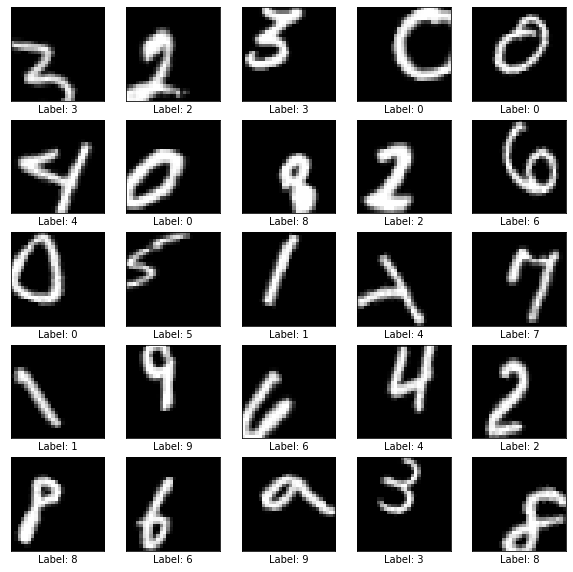

In [ ]:
augmented_images, augmented_labels = next(train_generator)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(augmented_images[i], axis=2), cmap=plt.cm.gray)
    plt.xlabel('Label: %d' % augmented_labels[i])
plt.show()

In [ ]:
improved_model = create_model()
improved_model.fit(train_generator, epochs=5, validation_data=test_generator)

Train for 1875 steps, validate for 313 steps
Epoch 1/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.9809 - accuracy: 0.6822 - val_loss: 0.4961 - val_accuracy: 0.8551
Epoch 2/5
1875/1875 [==============================] - 143s 76ms/step - loss: 0.4833 - accuracy: 0.8570 - val_loss: 0.3521 - val_accuracy: 0.8961
Epoch 3/5
1875/1875 [==============================] - 142s 76ms/step - loss: 0.3842 - accuracy: 0.8848 - val_loss: 0.3040 - val_accuracy: 0.9090
Epoch 4/5
1875/1875 [==============================] - 142s 76ms/step - loss: 0.3447 - accuracy: 0.8957 - val_loss: 0.2830 - val_accuracy: 0.9172
Epoch 5/5
1875/1875 [==============================] - 142s 76ms/step - loss: 0.3138 - accuracy: 0.9045 - val_loss: 0.2425 - val_accuracy: 0.9258


In [ ]:
# Convert Keras model to TF Lite format and quantize.
converter = tf.lite.TFLiteConverter.from_keras_model(improved_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Save the quantized model to file to the Downloads directory
f = open('mnist.tflite', "wb")
f.write(tflite_quantized_model)
f.close()

# Download the digit classification model
from google.colab import files
files.download('mnist.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>